# Initial Setup

## Import section

In [123]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import MeanShift
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score
import random

## Reading input file

In [6]:
df = pd.read_csv('..\\Phase 1\\\PreprocessedDataset.csv')
df

,Unnamed: 0,University,Abbreviation,Department,Course title,Unit,Professor,Objective,Description,Projects,University Homepage,Course Homepage,Objective stemmed,Project stemmed,Description stemmed,Objective lemmatized,Project lemmatized,Description lemmatized
0,0,University of Newcastle,NU,"Architecture, Planning and Landscape",Planning Contexts,20,Dr Alexander Wilson,This module introduces the hybridity of the pl...,Students will be introduced to key ideas throu...,The first assignment enables the students to r...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['thi', 'modul', 'introduc', 'hybrid', 'plan',...","['the', 'first', 'assign', 'enabl', 'student',...","['student', 'introduc', 'key', 'idea', 'a', 'l...","['This', 'module', 'introduces', 'hybridity', ...","['The', 'first', 'assignment', 'enables', 'stu...","['Students', 'introduced', 'key', 'idea', 'a',..."
1,1,University of Newcastle,NU,"Architecture, Planning and Landscape",Participation: Theories & Practice,20,Mrs Armelle Tardiveau,This module aims to get you to:\r\na. D...,Initial lectures contextualise the theory that...,Assignment One\r\nGroup presentation showcasin...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['thi', 'modul', 'aim', 'get', 'develop', 'cri...","['assign', 'one', 'group', 'present', 'showcas...","['initi', 'lectur', 'contextualis', 'theori', ...","['This', 'module', 'aim', 'get', 'Develop', 'c...","['Assignment', 'One', 'Group', 'presentation',...","['Initial', 'lecture', 'contextualise', 'theor..."
2,2,University of Newcastle,NU,"Architecture, Planning and Landscape",Alternative Practice: Co-producing Space,20,Mr Daniel Mallo,Alternative Practice: Co-producing Space explo...,Initial lecture introduces the module and will...,The co-production project addresses a real iss...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['altern', 'practic', 'co', 'produc', 'space',...","['the', 'co', 'product', 'project', 'address',...","['initi', 'lectur', 'introduc', 'modul', 'foll...","['Alternative', 'Practice', 'Co', 'producing',...","['The', 'co', 'production', 'project', 'addres...","['Initial', 'lecture', 'introduces', 'module',..."
3,3,University of Newcastle,NU,"Architecture, Planning and Landscape",Introduction to Architecture,20,Professor Katie Lloyd Thomas,To enable students to:\n\r\nDevelop an awarene...,In semester 1 a mixture of scheduled and struc...,The poster – or pamphlet explaining a historic...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['to', 'enabl', 'student', 'develop', 'awar', ...","['the', 'poster', 'pamphlet', 'explain', 'hist...","['in', 'semest', '1', 'mixtur', 'schedul', 'st...","['To', 'enable', 'student', 'Develop', 'awaren...","['The', 'poster', 'pamphlet', 'explaining', 'h...","['In', 'semester', '1', 'mixture', 'scheduled'..."
4,4,University of Newcastle,NU,"Architecture, Planning and Landscape",Architectural Representation 2,10,Dr Carlos Calderon,The aims of the module are to enable students ...,"The topics are explored through lectures, pres...","A structured approach to 2D CAD drawings, 3D c...",https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['the', 'aim', 'modul', 'enabl', 'student', 'p...","['a', 'structur', 'approach', '2d', 'cad', 'dr...","['the', 'topic', 'explor', 'lectur', 'present'...","['The', 'aim', 'module', 'enable', 'student', ...","['A', 'structured', 'approach', '2D', 'CAD', '...","['The', 'topic', 'explored', 'lecture', 'prese..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1318,University of Newcastle,NU,Natural and Environmental Sciences,Ecology of Marine Systems,20,Dr Jane Delany,To build on the fundamentals of the functionin...,Lectures and supporting materials are designed...,The two 1000-word (or equivalent) pieces of fo...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['to', 'build', 'fundament',

In [7]:
df.drop(columns=['Unnamed: 0'])

,University,Abbreviation,Department,Course title,Unit,Professor,Objective,Description,Projects,University Homepage,Course Homepage,Objective stemmed,Project stemmed,Description stemmed,Objective lemmatized,Project lemmatized,Description lemmatized
0,University of Newcastle,NU,"Architecture, Planning and Landscape",Planning Contexts,20,Dr Alexander Wilson,This module introduces the hybridity of the pl...,Students will be introduced to key ideas throu...,The first assignment enables the students to r...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['thi', 'modul', 'introduc', 'hybrid', 'plan',...","['the', 'first', 'assign', 'enabl', 'student',...","['student', 'introduc', 'key', 'idea', 'a', 'l...","['This', 'module', 'introduces', 'hybridity', ...","['The', 'first', 'assignment', 'enables', 'stu...","['Students', 'introduced', 'key', 'idea', 'a',..."
1,University of Newcastle,NU,"Architecture, Planning and Landscape",Participation: Theories & Practice,20,Mrs Armelle Tardiveau,This module aims to get you to:\r\na. D...,Initial lectures contextualise the theory that...,Assignment One\r\nGroup presentation showcasin...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['thi', 'modul', 'aim', 'get', 'develop', 'cri...","['assign', 'one', 'group', 'present', 'showcas...","['initi', 'lectur', 'contextualis', 'theori', ...","['This', 'module', 'aim', 'get', 'Develop', 'c...","['Assignment', 'One', 'Group', 'presentation',...","['Initial', 'lecture', 'contextualise', 'theor..."
2,University of Newcastle,NU,"Architecture, Planning and Landscape",Alternative Practice: Co-producing Space,20,Mr Daniel Mallo,Alternative Practice: Co-producing Space explo...,Initial lecture introduces the module and will...,The co-production project addresses a real iss...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['altern', 'practic', 'co', 'produc', 'space',...","['the', 'co', 'product', 'project', 'address',...","['initi', 'lectur', 'introduc', 'modul', 'foll...","['Alternative', 'Practice', 'Co', 'producing',...","['The', 'co', 'production', 'project', 'addres...","['Initial', 'lecture', 'introduces', 'module',..."
3,University of Newcastle,NU,"Architecture, Planning and Landscape",Introduction to Architecture,20,Professor Katie Lloyd Thomas,To enable students to:\n\r\nDevelop an awarene...,In semester 1 a mixture of scheduled and struc...,The poster – or pamphlet explaining a historic...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['to', 'enabl', 'student', 'develop', 'awar', ...","['the', 'poster', 'pamphlet', 'explain', 'hist...","['in', 'semest', '1', 'mixtur', 'schedul', 'st...","['To', 'enable', 'student', 'Develop', 'awaren...","['The', 'poster', 'pamphlet', 'explaining', 'h...","['In', 'semester', '1', 'mixture', 'scheduled'..."
4,University of Newcastle,NU,"Architecture, Planning and Landscape",Architectural Representation 2,10,Dr Carlos Calderon,The aims of the module are to enable students ...,"The topics are explored through lectures, pres...","A structured approach to 2D CAD drawings, 3D c...",https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['the', 'aim', 'modul', 'enabl', 'student', 'p...","['a', 'structur', 'approach', '2d', 'cad', 'dr...","['the', 'topic', 'explor', 'lectur', 'present'...","['The', 'aim', 'module', 'enable', 'student', ...","['A', 'structured', 'approach', '2D', 'CAD', '...","['The', 'topic', 'explored', 'lecture', 'prese..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,University of Newcastle,NU,Natural and Environmental Sciences,Ecology of Marine Systems,20,Dr Jane Delany,To build on the fundamentals of the functionin...,Lectures and supporting materials are designed...,The two 1000-word (or equivalent) pieces of fo...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['to', 'build', 'fundament', 'function', 'key'...","['the'

In [9]:
df.loc[0:1]

,Unnamed: 0,University,Abbreviation,Department,Course title,Unit,Professor,Objective,Description,Projects,University Homepage,Course Homepage,Objective stemmed,Project stemmed,Description stemmed,Objective lemmatized,Project lemmatized,Description lemmatized
0,0,University of Newcastle,NU,"Architecture, Planning and Landscape",Planning Contexts,20,Dr Alexander Wilson,This module introduces the hybridity of the pl...,Students will be introduced to key ideas throu...,The first assignment enables the students to r...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['thi', 'modul', 'introduc', 'hybrid', 'plan',...","['the', 'first', 'assign', 'enabl', 'student',...","['student', 'introduc', 'key', 'idea', 'a', 'l...","['This', 'module', 'introduces', 'hybridity', ...","['The', 'first', 'assignment', 'enables', 'stu...","['Students', 'introduced', 'key', 'idea', 'a',..."
1,1,University of Newcastle,NU,"Architecture, Planning and Landscape",Participation: Theories & Practice,20,Mrs Armelle Tardiveau,This module aims to get you to:\r\na. D...,Initial lectures contextualise the theory that...,Assignment One\r\nGroup presentation showcasin...,https://www.ncl.ac.uk/,http://www.ncl.ac.uk/mobility/experience-newca...,"['thi', 'modul', 'aim', 'get', 'develop', 'cri...","['assign', 'one', 'group', 'present', 'showcas...","['initi', 'lectur', 'contextualis', 'theori', ...","['This', 'module', 'aim', 'get', 'Develop', 'c...","['Assignment', 'One', 'Group', 'presentation',...","['Initial', 'lecture', 'contextualise', 'theor..."


## Preparing The preprocessed text
The dataframe columns include strings while we want to have lists which consist of strings as their elements.

In [10]:
texts = []
labels = []
for i in range(df.shape[0]):
    lst = []
    obj_lst = df.loc[i,'Objective stemmed'].strip('][').split(', ')
    for j in range(len(obj_lst)):
        obj_lst[j] = obj_lst[j].replace('\'','')
    lst.extend(obj_lst)
    prj_lst = df.loc[i,'Project stemmed'].strip('][').split(', ')
    for k in range(len(prj_lst)):
        prj_lst[k] = prj_lst[k].replace('\'','')
    lst.extend(prj_lst)
    dscr_lst = df.loc[i,'Description stemmed'].strip('][').split(', ')
    for w in range(len(dscr_lst)):
        dscr_lst[w] = dscr_lst[w].replace('\'','')
    lst.extend(dscr_lst)
    texts.append(lst)

In [11]:
len(texts)

1323

The departments will be our labels and each label will be identified by a number in range(0,17)

In [12]:
labels = df.Department.tolist()
unique_labels = set(labels)
unique_labels = list(unique_labels)
for i in range(len(labels)):
    labels[i] = unique_labels.index(labels[i])
len(labels)

1323

In [140]:
print(set(labels))
print(len(set(labels)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
17


In [13]:
texts_lem = []
for i in range(df.shape[0]):
    lst = []
    obj_lst_lem = df.loc[i,'Objective lemmatized'].strip('][').split(', ')
    for j in range(len(obj_lst_lem)):
        obj_lst_lem[j] = obj_lst_lem[j].replace('\'','')
    lst.extend(obj_lst_lem)
    prj_lst_lem = df.loc[i,'Project lemmatized'].strip('][').split(', ')
    for k in range(len(prj_lst_lem)):
        prj_lst_lem[k] = prj_lst_lem[k].replace('\'','')
    lst.extend(prj_lst_lem)
    dscr_lst_lem = df.loc[i,'Description lemmatized'].strip('][').split(', ')
    for w in range(len(dscr_lst_lem)):
        dscr_lst_lem[w] = dscr_lst_lem[w].replace('\'','')
    lst.extend(dscr_lst_lem)
    texts_lem.append(lst)

# Embedding
Here we embed all the words using [SentenceTransformer](https://www.sbert.net/).

## Creating the model

In [14]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)
embeddings.tolist()
print(len(embeddings))
print(embeddings[0:5])

1323
[[-0.14620808  0.10263798 -0.02808991 ...  0.02871472 -0.04697701
  -0.060378  ]
 [-0.14620806  0.10263797 -0.02808992 ...  0.0287147  -0.04697701
  -0.06037798]
 [-0.1307187  -0.00558036  0.03892567 ... -0.0155642   0.0153059
   0.02113917]
 [-0.02459153  0.03640758 -0.05232867 ...  0.0660159   0.02469461
   0.00353143]
 [-0.03059881  0.00795008 -0.03910096 ...  0.06986146 -0.03801024
   0.1051393 ]]


## Splitting train and test data
Using [Holdout]([https://link](https://vitalflux.com/hold-out-method-for-training-machine-learning-model/)) strategy (70% train, 30% test).

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(embeddings, labels, test_size=0.3, random_state=30)

In [ ]:
print("X_train: " + str(len(X_train)))
print("Y_train: " + str(len(Y_train)))
print("X_test: " + str(len(X_test)))
print("Y_test: " + str(len(Y_test)))

X_train: 926
Y_train: 926
X_test: 397
Y_test: 397


## Defining required functions

### Plot an n-dimensional data on scatter plot (n>2)

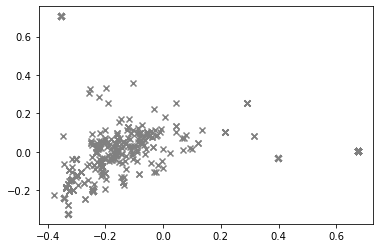

In [ ]:
def plot(data,plot_color):
    pca = sklearnPCA(n_components=2) #2-dimensional PCA
    transformed = pd.DataFrame(pca.fit_transform(data))
    plt.scatter(transformed[0], transformed[1], marker='x', color=plot_color)
    plt.show()
plot(X_train, 'gray')

In [ ]:
colors_dict = {
    0 : '#800000',
    1 : '#9A6324',
    2 : '#808000',
    3 : '#469990',
    4 : '#000075',
    5 : '#e6194B',
    6 : '#f58231',
    7 : '#ffe119',
    8 : '#bfef45',
    9 : '#3cb44b',
    10 : '#42d4f4',
    11 : '#4363d8',
    12 : '#911eb4',
    13 : '#f032e6',
    14 : '#fabed4',
    15 : '#ffd8b1',
    16 : '#fffac8',
    -1 : '#030300',
    17 : '#aaffc3',
    18 : '#dcbeff',
    19 : '#1f918a'
}

### Plot result labels from clustering methods

In [ ]:
def plot_clusters(labels,title):
    unique_labs = set(labels)
    for lab in unique_labs:
        ellist = []
        for i in range(len(labels)):
            if labels[i]==lab:
                ellist.append(X_train[i])
        if(len(ellist)>=2):        
            pca = sklearnPCA(n_components=2) #2-dimensional PCA
            transformed = pd.DataFrame(pca.fit_transform(ellist))
            plt.scatter(transformed[0], transformed[1], marker='x', color=colors_dict[lab])
    plt.title(title,loc='center')
    plt.show()

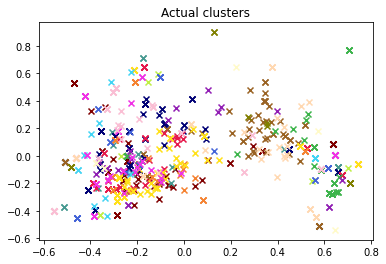

In [ ]:
plot_clusters(Y_train, 'Actual clusters')

### [Purity]([https://link](https://towardsdatascience.com/evaluation-metrics-for-clustering-models-5dde821dd6cd#:~:text=Purity%20is%20quite%20simple%20to,number%20of%20total%20data%20points.&text=Each%20cluster%20is%20assigned%20with%20the%20most%20frequent%20class%20label.)) Score Calculator

In [ ]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# Clustering

## K-means

In [ ]:
kmeans = KMeans(n_clusters=17, random_state=0,init= 'k-means++', n_init=20, max_iter=500)
X_new_kmeans = kmeans.fit_transform(X_train)

In [ ]:
Y_pred_kmeans = kmeans.predict(X_test)

In [ ]:
purity = purity_score(Y_pred_kmeans, Y_test)
print('kmeans purity: ', purity)

kmeans purity:  0.33753148614609574


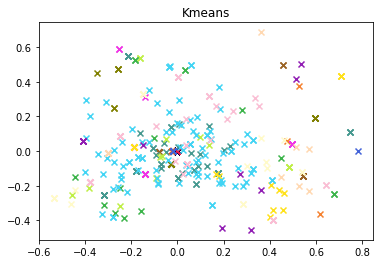

In [ ]:
plot_clusters(kmeans.labels_, 'Kmeans')

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.84, min_samples=3)
dbscan.fit(X_train)

DBSCAN(eps=0.84, min_samples=3)

In [ ]:
dbscan.labels_

array([ 0,  1,  2,  3,  2,  4,  1,  2,  1,  2,  0, -1,  5,  4, -1,  6,  4,
       -1,  1,  1, -1, -1,  7, -1,  3,  8,  3,  3,  0,  9,  8,  2, 10, -1,
        0,  0, 11,  4,  3,  9,  0,  0,  1,  3,  2,  0,  4,  1,  2, -1, 12,
        1,  0,  1,  1,  1,  1,  4,  4,  4,  0,  9,  9,  1, -1,  8,  3, -1,
       -1,  1,  2, -1, 13,  1,  1, 10,  0,  0,  1, -1,  4, 14,  5, -1,  1,
        1,  2,  4,  0, -1, -1, -1,  0,  3,  1, -1,  1,  1,  1, -1, 10,  1,
       -1,  0,  8, -1, -1,  1,  0, -1, -1,  1,  0,  4,  4,  3,  1,  1,  0,
        0, 13,  0,  0,  8,  2,  3,  1, -1,  1,  1,  3, -1,  2,  1,  1, -1,
        1, -1,  1,  9, -1,  4,  0,  3, -1,  1,  8, -1,  0,  2,  9,  2,  1,
        1, -1, -1,  1, 12, 11,  1,  9,  1,  3, 11,  9,  3,  1,  1,  1,  2,
        1,  4, -1,  1,  1,  3,  1,  0,  1,  0,  1,  0,  8,  3,  0,  1,  0,
        1,  3,  1,  3,  7, -1,  6,  2,  4,  1,  1,  1,  1,  0,  3,  1,  2,
        2,  1, -1, -1,  1,  8,  1, -1, -1,  3,  0,  1,  1,  8,  1,  2,  3,
        2,  0,  1, -1,  2

In [ ]:
Y_pred_dbscan = dbscan.fit_predict(X_test)
purity = purity_score(Y_pred_dbscan, Y_test)
print('DBSCAN purity: ', purity)

DBSCAN purity:  0.3954659949622166


In [ ]:
noises = 0
for i in Y_pred_dbscan:
    if i==-1:
        noises += 1 
print(noises)

68


## Meanshift

In [ ]:
meanshift = MeanShift(bandwidth=0.6 ,cluster_all=False)
meanshift.fit(X_train)

MeanShift(bandwidth=0.6, cluster_all=False)

In [ ]:
Y_pred_meanshift = meanshift.predict(X_test)

In [ ]:
meanshift.labels_

array([  0,   1,   8,   7,   2,   0,   4,   1,   4,   0,   4,   0,   1,
         0,   4,   1,   2,   2,   0, 142,   4,   6,  36, 137,   0,  46,
         2, 172,  37,   0, 143,   2,   0,   7,   1,   5,   2,  11,   0,
         0,  11, 162,  72,   0,   0,   0,   0, 187,   1,  11,   4,   8,
         3, 165,   5,   0,   0, 102,   3, 199, 106,  24, 161,   0,   5,
         0,   0,   0,   5, 123,   3,   0,  30,   0,   2,   7,   7, 151,
         0,  16,  22, 184,   0,   0,   3,   6,   1,   3, 175,   5,  54,
        74,   4,  70,   1,   1,   4,   0,   1,  32, 194,  86,   5,   0,
         0,  52,  76,   0,   0,   6,   5,   5,   3,  28,   0,   0,  25,
         6,   3, 158,   0,   0,   0,   0,   0,   0,   3, 183,   2,   2,
         4,   3,  10,   0,  96, 201,  30,   3,   0,  95,   3,   0,   5,
         7,  54,   4,   0,   2,   6,   0,   4,   3,  41,  29,   5,   1,
         4,   4,   0, 116,  19,   0,   0,   2,   0, 176,  92,   0,  17,
         2,   3,   4,  28,   0,  23,   0, 122, 163,   0,   3,  8

In [ ]:
purity = purity_score(Y_pred_meanshift, Y_test)
print('Meanshift purity: ', purity)

Meanshift purity:  0.30730478589420657


## Hierarchical methods

### Dendrogram analysis

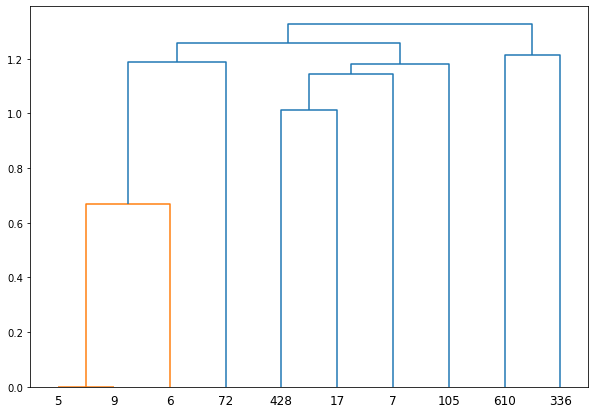

In [ ]:
X_train_list = X_train.tolist()
X = random.sample(X_train_list, 10)

linked = linkage(X, 'complete')

labelList = [X_train_list.index(x) for x in X]

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### AGNES

In [ ]:
agnes = AgglomerativeClustering(n_clusters=17,compute_full_tree=True , affinity='manhattan', linkage='average')
agnes.fit(X_train)

AgglomerativeClustering(affinity='manhattan', compute_full_tree=True,
                        linkage='average', n_clusters=17)

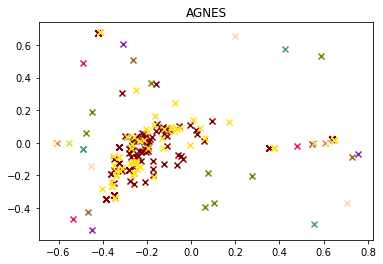

In [ ]:
plot_clusters(agnes.labels_, 'AGNES')

In [ ]:
Y_pred_agnes = agnes.fit_predict(X_test)
purity = purity_score(Y_pred_agnes, Y_test)
print('AGNES purity: ', purity)

AGNES purity:  0.6246851385390428


# Conclusion

In [ ]:
scores_df = pd.DataFrame([[purity_score(Y_pred_agnes, Y_test),purity_score(Y_pred_dbscan, Y_test),
    purity_score(Y_pred_kmeans, Y_test),purity_score(Y_pred_meanshift, Y_test)]], columns=['AGNES','DBSCAN','Kmeans','Meanshift']
    , index=['Purity score'])
scores_df

,AGNES,DBSCAN,Kmeans,Meanshift
Purity score,0.624685,0.395466,0.337531,0.307305
